In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data1990 = pd.read_csv("https://hyd123.s3.us-east-2.amazonaws.com/updated_data/1990data_final.csv")
data2000 = pd.read_csv("https://hyd123.s3.us-east-2.amazonaws.com/updated_data/2000data_final.csv")
data2010 = pd.read_csv("https://hyd123.s3.us-east-2.amazonaws.com/updated_data/2010data_final.csv")
data2019 = pd.read_csv("https://hyd123.s3.us-east-2.amazonaws.com/updated_data/2019data_final.csv")#("https://hyd123.s3.us-east-2.amazonaws.com/2019data_redo.csv")

In [4]:
data1990 = pd.read_csv("https://hyd123.s3.us-east-2.amazonaws.com/updated_data/1990data_cleaned.csv")
data2000 = pd.read_csv("https://hyd123.s3.us-east-2.amazonaws.com/updated_data/2000data_cleaned.csv")
data2010 = pd.read_csv("https://hyd123.s3.us-east-2.amazonaws.com/updated_data/2010data_cleaned.csv")
data2019 = pd.read_csv("https://hyd123.s3.us-east-2.amazonaws.com/updated_data/2019data_cleaned.csv")

In [5]:
data1990.columns

Index(['Unnamed: 0', 'acousticness', 'analysis_url', 'danceability',
       'duration_ms', 'energy', 'id', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'type', 'uri', 'valence'],
      dtype='object')

In [6]:
# label all dfs by publish year
data1990['year'] = 0
data2000['year'] = 1
data2010['year'] = 2
data2019['year'] = 3
data1990.head()

,Unnamed: 0,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,year
0,0,0.7360,https://api.spotify.com/v1/audio-analysis/1NCu...,0.780,322133,0.565,1NCuYqMc8hKMb4cpNTcJbD,0.002690,3,0.0630,-7.320,0,0.0306,101.967,4,https://api.spotify.com/v1/tracks/1NCuYqMc8hKM...,audio_features,spotify:track:1NCuYqMc8hKMb4cpNTcJbD,0.365,0
1,1,0.0561,https://api.spotify.com/v1/audio-analysis/51q3...,0.631,330933,0.935,51q3nDYWAqPY4hlgKEbP6j,0.152000,1,0.6340,-8.340,0,0.0587,109.122,4,https://api.spotify.com/v1/tracks/51q3nDYWAqPY...,audio_features,spotify:track:51q3nDYWAqPY4hlgKEbP6j,0.678,0
2,2,0.6570,https://api.spotify.com/v1/audio-analysis/5z3Z...,0.401,211973,0.285,5z3ZDMP02xF33yCvPFnct3,0.000011,11,0.1580,-11.005,1,0.0327,130.465,4,https://api.spotify.com/v1/tracks/5z3ZDMP02xF3...,audio_features,spotify:track:5z3ZDMP02xF33yCvPFnct3,0.267,0
3,3,0.0287,https://api.spotify.com/v1/audio-analysis/0UAE...,0.862,215040,0.918,0UAEHlFR79k9CJvknSGUNf,0.000001,10,0.0492,-7.325,0,0.1080,124.811,4,https://api.spotify.com/v1/tracks/0UAEHlFR79k9...,audio_features,spotify:track:0UAEHlFR79k9CJvknSGUNf,0.651,0
4,4,0.3340,https://api.spotify.com/v1/audio-analysis/1s12...,0.713,274093,0.432,1s12gYsPeTNQ6znow46nmp,0.000299,11,0.0674,-12.639,0,0.0300,118.955,4,https://api.spotify.com/v1/tracks/1s12gYsPeTNQ...,audio_features,spotify:track:1s12gYsPeTNQ6znow46nmp,0.445,0


In [7]:
# combine dfs into one
df = pd.concat([data1990, data2000,data2010,data2019], ignore_index=True,sort=False)

In [8]:
# only use the feature columns
df = df[['year','acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence']]
df = df.dropna(how = 'any')
df.tail()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
1564,3,0.1520,0.754,242573,0.646,0.000018,7,0.1080,-5.795,1,0.317,176.089,4,0.429
1565,3,0.4270,0.679,179973,0.443,0.000000,10,0.1060,-8.528,0,0.153,104.049,4,0.363
1566,3,0.0794,0.816,136366,0.582,0.000006,8,0.0916,-4.141,1,0.341,160.004,4,0.542
1567,3,0.3630,0.630,174333,0.671,0.000000,6,0.1130,-6.659,0,0.256,89.921,4,0.333
1568,3,0.5820,0.819,268893,0.458,0.173000,4,0.1280,-10.223,0,0.167,122.981,4,0.232


In [9]:
X = df[['acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence']]
y = df["year"].values#.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (1569, 13) (1569,)


In [10]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler 
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train) 
X_test_scaled = X_scaler.transform(X_test)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


### Decision Tree Model

In [12]:
from sklearn import tree 
clf = tree.DecisionTreeClassifier()

In [13]:
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)


0.30788804071246817

In [14]:
predictions = clf.predict(X_test_scaled)

In [15]:
test_result_df = pd.DataFrame({"Predicted": y_test, "Actual": predictions})[["Predicted", "Actual"]]
test_result_df.head()

,Predicted,Actual
0,3,1
1,2,1
2,0,1
3,2,1
4,2,2


In [16]:
feature_names = X.columns
sorted(zip(clf.feature_importances_, feature_names), reverse=True)

[(0.13260453812900372, 'loudness'),
 (0.11230641068131603, 'tempo'),
 (0.1118012921517546, 'duration_ms'),
 (0.1087621231852047, 'speechiness'),
 (0.09721004288403003, 'acousticness'),
 (0.09210750273510454, 'energy'),
 (0.08843748575456431, 'valence'),
 (0.08157654828591462, 'liveness'),
 (0.06922441643439481, 'danceability'),
 (0.04772324119970962, 'key'),
 (0.03932988902452284, 'instrumentalness'),
 (0.013550642178945775, 'mode'),
 (0.005365867355534341, 'time_signature')]

In [17]:
import graphviz
dot_data = tree.export_graphviz( clf, out_file=None, feature_names=feature_names, class_names=["1990","2000","2010","2019"], filled=True, rounded=True, special_characters=True)

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('music.png')
graph = graphviz.Source(dot_data) 
graph


InvocationException: GraphViz's executables not found

### Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(n_estimators=200) 
rf = rf.fit(X_train_scaled, y_train) 
rf.score(X_test_scaled, y_test)
feature_names = X.columns
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.12324510734357155, 'loudness'),
 (0.12156671560609068, 'duration_ms'),
 (0.09977746458081216, 'speechiness'),
 (0.09238159854553105, 'energy'),
 (0.08900290098108064, 'valence'),
 (0.08839146467346365, 'tempo'),
 (0.08499604771784763, 'acousticness'),
 (0.08364395140165948, 'danceability'),
 (0.07938502966680465, 'liveness'),
 (0.0652040163894877, 'instrumentalness'),
 (0.05283306447168796, 'key'),
 (0.01438582477333663, 'mode'),
 (0.005186813848626096, 'time_signature')]

In [19]:
rf.score(X_test_scaled, y_test)

0.44274809160305345

### Neural Network

In [20]:
from numpy.random import seed 
seed(42)

In [21]:
from keras.utils import to_categorical
y_train_cate = to_categorical(y_train)
y_test_cate = to_categorical(y_test)

Using TensorFlow backend.


In [22]:
from tensorflow.keras.models import Sequential 
model_neural = Sequential()


In [23]:
from tensorflow.keras.layers import Dense 
number_inputs = 13 
number_hidden_nodes = 100 
model_neural.add(Dense(units=number_hidden_nodes, activation='relu', input_dim=number_inputs))

for i in range(11):
    model_neural.add(Dense(units=number_hidden_nodes, activation='relu')) 

number_classes = 4 
model_neural.add(Dense(units=number_classes, activation='softmax'))
model_neural.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1400      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               1

In [24]:
model_neural.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model_neural.fit( X_train_scaled, y_train_cate, epochs=20, shuffle=True, verbose=2 )
model_loss, model_accuracy = model_neural.evaluate( X_test_scaled, y_test_cate, verbose=2) 
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


Train on 1176 samples
Epoch 1/20
1176/1176 - 2s - loss: 1.3714 - accuracy: 0.3112
Epoch 2/20
1176/1176 - 0s - loss: 1.2613 - accuracy: 0.3946
Epoch 3/20
1176/1176 - 0s - loss: 1.1945 - accuracy: 0.4651
Epoch 4/20
1176/1176 - 0s - loss: 1.1782 - accuracy: 0.4753
Epoch 5/20
1176/1176 - 0s - loss: 1.1534 - accuracy: 0.4974
Epoch 6/20
1176/1176 - 0s - loss: 1.1350 - accuracy: 0.4949
Epoch 7/20
1176/1176 - 0s - loss: 1.1116 - accuracy: 0.5213
Epoch 8/20
1176/1176 - 0s - loss: 1.0854 - accuracy: 0.5357
Epoch 9/20
1176/1176 - 0s - loss: 1.0688 - accuracy: 0.5357
Epoch 10/20
1176/1176 - 0s - loss: 1.0504 - accuracy: 0.5374
Epoch 11/20
1176/1176 - 0s - loss: 1.0428 - accuracy: 0.5340
Epoch 12/20
1176/1176 - 0s - loss: 1.0047 - accuracy: 0.5859
Epoch 13/20
1176/1176 - 0s - loss: 0.9634 - accuracy: 0.6037
Epoch 14/20
1176/1176 - 0s - loss: 0.9135 - accuracy: 0.6293
Epoch 15/20
1176/1176 - 0s - loss: 0.8667 - accuracy: 0.6480
Epoch 16/20
1176/1176 - 0s - loss: 0.8725 - accuracy: 0.6335
Epoch 17/20

### K Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = [] 
test_scores = []
for k in range(1, 20, 2):
      knn = KNeighborsClassifier(n_neighbors=k)
      knn.fit(X_train_scaled, y_train)  
      train_score = knn.score(X_train_scaled, y_train)
      test_score = knn.score(X_test_scaled, y_test) 
      train_scores.append(train_score) 
      test_scores.append(test_score)
      print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")


k: 1, Train/Test Score: 0.972/0.326
k: 3, Train/Test Score: 0.656/0.313
k: 5, Train/Test Score: 0.591/0.338
k: 7, Train/Test Score: 0.565/0.364
k: 9, Train/Test Score: 0.547/0.392
k: 11, Train/Test Score: 0.560/0.402
k: 13, Train/Test Score: 0.535/0.394
k: 15, Train/Test Score: 0.520/0.397
k: 17, Train/Test Score: 0.512/0.384
k: 19, Train/Test Score: 0.516/0.394


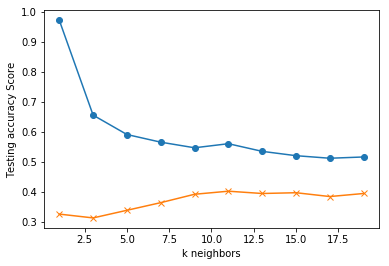

<Figure size 432x288 with 0 Axes>

In [39]:
plt.plot(range(1, 20, 2), train_scores, marker='o') 
plt.plot(range(1, 20, 2), test_scores, marker="x") 
plt.xlabel("k neighbors") 
plt.ylabel("Testing accuracy Score")
plt.show()
plt.savefig("K_Neighbors.png")

<Figure size 432x288 with 0 Axes>

In [28]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train) 
print('k=11 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))


k=11 Test Acc: 0.402


### Gaussian Naive Bayes

In [29]:
#from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
gnb.score(X_test_scaled, y_test)

0.37404580152671757

### Support Vector Machine

In [30]:
from sklearn.svm import SVC
model_svc = SVC(kernel='linear') 
model_svc.fit(X_train_scaled, y_train)

from sklearn.metrics import classification_report
predictions = model_svc.predict(X_test_scaled)

print(classification_report(y_test, predictions, target_names=["1990", "2000","2010","2019"]))


              precision    recall  f1-score   support

        1990       0.41      0.41      0.41       109
        2000       0.32      0.26      0.29        88
        2010       0.39      0.40      0.39       101
        2019       0.48      0.55      0.51        95

   micro avg       0.41      0.41      0.41       393
   macro avg       0.40      0.40      0.40       393
weighted avg       0.40      0.41      0.40       393



In [31]:
svm_predictions = model_svc.predict(X_test_scaled) 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, svm_predictions) 
cm

array([[45, 22, 20, 22],
       [27, 23, 24, 14],
       [23, 18, 40, 20],
       [14, 10, 19, 52]], dtype=int64)

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training Data Score: 0.46003401360544216
Testing Data Score: 0.40458015267175573


In [33]:
from sklearn.linear_model import LogisticRegressionCV 
classifier = LogisticRegressionCV(multi_class="multinomial")
classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Training Data Score: 0.4685374149659864
Testing Data Score: 0.3994910941475827


In [34]:
from sklearn.linear_model import RidgeClassifierCV
classifier = RidgeClassifierCV()
classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.4549319727891156
Testing Data Score: 0.40966921119592875
